**Classifying newswires: a multiclass classification example**

#Load the dataset

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [2]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [3]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [4]:
# Decode newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
print(decode_review)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 2us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Note: "0" - Padding. "1" - Start of sequence. "2" - Unknown.

#Prepare the data

**Encoding the integer sequence via multi-hot encoding**

In [5]:
# Prepare inputs by using multi-hot encoding

import numpy as np

# TODO: implement the following function for multi-hot encoding for inputs
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1.0
  return result
  # TODO

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
# Prepare outputs by using one-hot encoding

# TODO: implement one-hot encoding for outputs
def to_one_hot(labels, dimension=46):
  result = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    result[i, label] = 1.0
  return result
  # TODO

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

Note: it can also use the built-in function in Keras:
```
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
```



#Build the model

**Define the model**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

# TODO: build DL NN model
model = keras.Sequential(
    [
        # TODO
        layers.Dense(64, activation="relu", input_shape=(10000,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax")
    ]
)

**Compile the model**

In [10]:
# TODO: fill in the information for compiling the model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
  # TODO
)

#Validate the model

**Fit the model with a validation set**

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [12]:
# TODO: train the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
    # TODO
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.3352 - loss: 3.2733 - val_accuracy: 0.6190 - val_loss: 1.8807
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6675 - loss: 1.6703 - val_accuracy: 0.6970 - val_loss: 1.3855
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7326 - loss: 1.2223 - val_accuracy: 0.7470 - val_loss: 1.1868
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7916 - loss: 1.0023 - val_accuracy: 0.7690 - val_loss: 1.0734
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8296 - loss: 0.7923 - val_accuracy: 0.7880 - val_loss: 0.9938
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8562 - loss: 0.6737 - val_accuracy: 0.7860 - val_loss: 0.9871
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8780 - loss: 0.5665 - val_accuracy: 0.8100 - val_loss: 0.9130
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9028 - loss: 0.4743 - val_accuracy: 0.8000 - 

**Plot the training and validation loss**

In [13]:
import matplotlib.pyplot as plt

def plot_training_validation_results(training_results, validation_results,
                                     title, ylabel):
  print("training: ", training_results)
  print("validation: ", validation_results)
  plt.clf()
  epochs = range(1, len(training_results)+1)
  plt.plot(epochs, training_results, "bo", label="Training")
  plt.plot(epochs, validation_results, "b", label="Validation")
  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

training:  [2.813119888305664, 1.574831485748291, 1.1862447261810303, 0.9605906009674072, 0.7957698702812195, 0.6610216498374939, 0.558089554309845, 0.4661703109741211, 0.39940011501312256, 0.33845624327659607, 0.29279452562332153, 0.257190078496933, 0.22616195678710938, 0.2071038782596588, 0.18381644785404205, 0.17547017335891724, 0.16374319791793823, 0.145280659198761, 0.14410820603370667, 0.130694180727005]
validation:  [1.8807401657104492, 1.3854519128799438, 1.1868066787719727, 1.0733805894851685, 0.993753969669342, 0.9871001243591309, 0.9130432605743408, 0.9103600978851318, 0.8945262432098389, 0.8779093027114868, 0.870713472366333, 0.8687850832939148, 0.8930960893630981, 0.8985503911972046, 0.9099599719047546, 0.9111819863319397, 0.9125021696090698, 0.9267779588699341, 0.9376162886619568, 0.9650884866714478]


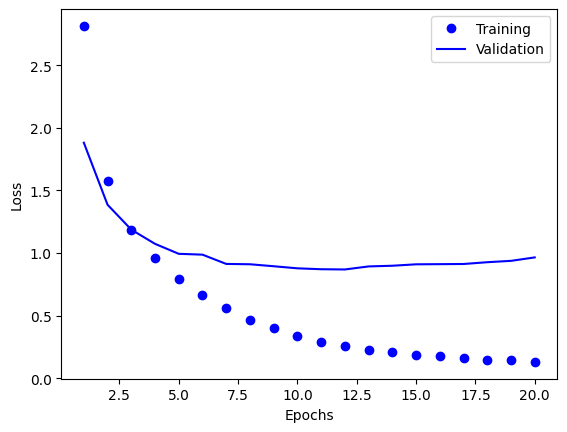

In [14]:
history_dict = history.history
training_loss_values = history_dict["loss"]
validation_loss_values = history_dict["val_loss"]
plot_training_validation_results(training_loss_values, validation_loss_values,
                                 "Training and validation loss", "Loss")

training:  [0.47469305992126465, 0.6812828779220581, 0.741418182849884, 0.7950388193130493, 0.8252317905426025, 0.8574292063713074, 0.8821097612380981, 0.9002756476402283, 0.911676287651062, 0.9259583950042725, 0.936356782913208, 0.9423703551292419, 0.946128785610199, 0.9495114088058472, 0.9528940320014954, 0.9517664909362793, 0.9532698392868042, 0.9561513662338257, 0.9556502103805542, 0.9571536183357239]
validation:  [0.6190000176429749, 0.6970000267028809, 0.746999979019165, 0.7689999938011169, 0.7879999876022339, 0.7860000133514404, 0.8100000023841858, 0.800000011920929, 0.8019999861717224, 0.8100000023841858, 0.8140000104904175, 0.8190000057220459, 0.8140000104904175, 0.8180000185966492, 0.8040000200271606, 0.8130000233650208, 0.8169999718666077, 0.8140000104904175, 0.8009999990463257, 0.8130000233650208]


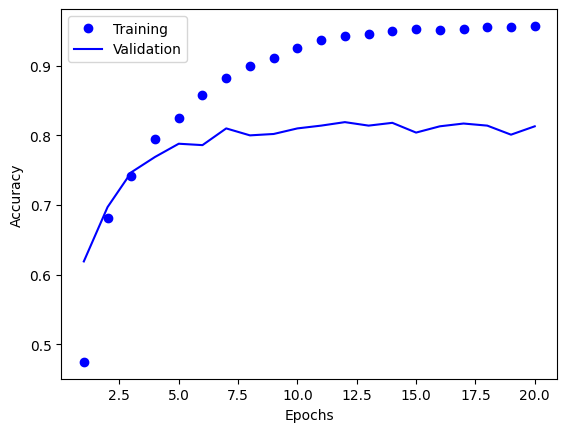

In [15]:
training_acc = history_dict["accuracy"]
validation_acc = history_dict["val_accuracy"]
plot_training_validation_results(training_acc, validation_acc,
                                 "Training and validation accuracy",
                                 "Accuracy")

**Refine the model**

In [16]:
# TODO: build DL NN model
model = keras.Sequential(
    [
        # TODO
        layers.Dense(64, activation="relu", input_shape=(10000,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax")
    ]
)

# TODO: fill in the information for compiling the model
model.compile(
    # TODO
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# TODO: train the model using the best epoch
model.fit(
    # TODO
    x_train,
    y_train,
    epochs=12,
    batch_size=512,
    validation_data=(x_val, y_val)
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.3546 - loss: 3.1195 - val_accuracy: 0.6200 - val_loss: 1.7104
Epoch 2/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6661 - loss: 1.5594 - val_accuracy: 0.7350 - val_loss: 1.1973
Epoch 3/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7412 - loss: 1.1662 - val_accuracy: 0.7930 - val_loss: 0.9379
Epoch 4/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7915 - loss: 0.9618 - val_accuracy: 0.8480 - val_loss: 0.7582
Epoch 5/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8354 - loss: 0.7757 - val_accuracy: 0.8770 - val_loss: 0.6055
Epoch 6/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8675 - loss: 0.6283 - val_accuracy: 0.9030 - val_loss: 0.5125
Epoch 7/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8883 - loss: 0.5452 - val_accuracy: 0.9260 - val_loss: 0.4139
Epoch 8/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9065 - loss: 0.4485 - val_accuracy: 0.9330 - 

#Predict new data

In [17]:
model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[2.6461721e-04, 5.0267532e-05, 1.3939320e-04, ..., 3.3025429e-04,
        1.3707934e-06, 6.4849581e-07],
       [2.5809911e-04, 6.6155749e-03, 1.6920765e-05, ..., 7.5754324e-05,
        1.5754669e-04, 1.0894327e-02],
       [4.6072430e-03, 9.1001981e-01, 1.6431604e-03, ..., 1.7760150e-04,
        1.8495410e-04, 6.2366558e-04],
       ...,
       [4.9254417e-05, 1.0119316e-03, 5.4469619e-05, ..., 1.5939919e-04,
        1.0958506e-05, 3.4616903e-06],
       [7.1205092e-03, 7.9597361e-02, 7.5029833e-03, ..., 2.9422103e-03,
        1.7620192e-04, 2.9583447e-04],
       [1.8143670e-05, 1.3982238e-01, 1.4341141e-03, ..., 1.0016375e-04,
        1.0721302e-03, 1.9032480e-04]], dtype=float32)

In [18]:
results = model.evaluate(x_test, y_test)
print(results)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8159 - loss: 0.8848
[0.9157588481903076, 0.8040961623191833]


#Other experiments

##Consider the baseline

In [19]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.18967052537845058)

In [20]:
results = np.zeros(46)
for label in test_labels:
  results[label] += 1
print(results)
print(max(results))
print(max(results) / sum(results))

[ 12. 105.  20. 813. 474.   5.  14.   3.  38.  25.  30.  83.  13.  37.
   2.   9.  99.  12.  20. 133.  70.  27.   7.  12.  19.  31.   8.   4.
  10.   4.  12.  13.  10.   5.   7.   6.  11.   2.   3.   5.  10.   8.
   3.   6.   5.   1.]
813.0
0.3619768477292965


In [21]:
results = np.zeros(46)
for label in train_labels:
  results[label] += 1
print(results)
print(max(results))
print(max(results) / sum(results))

[  55.  432.   74. 3159. 1949.   17.   48.   16.  139.  101.  124.  390.
   49.  172.   26.   20.  444.   39.   66.  549.  269.  100.   15.   41.
   62.   92.   24.   15.   48.   19.   45.   39.   32.   11.   50.   10.
   49.   19.   19.   24.   36.   30.   13.   21.   12.   18.]
3159.0
0.3517034068136273
